In [40]:
%matplotlib inline

In [109]:
import matplotlib

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [115]:
expts = {'really-no-etcd':1, '1-nodes':1, '2-nodes':2, '4-nodes':4, '8-nodes':8, '12-nodes':12, '16-nodes':16}
labels = {'really-no-etcd' : '1 node, no repl.',
          '1-nodes' : '1 node, w/ repl.',
          '2-nodes' : '2 nodes (1 zone)',
          '4-nodes' : '4 nodes (1 zone)',
          '8-nodes' : '8 nodes (1 zone)',
          '12-nodes' : '12 nodes (2 zones)',
          '16-nodes' : '16 nodes (3 zones)'
}

labels = {'really-no-etcd' : 0,
          '1-nodes' : 1,
          '2-nodes' : 2,
          '4-nodes' : 4,
          '8-nodes' : 8,
          '12-nodes' : 12,
          '16-nodes' : 16
} 
names = []
num_expts = len(expts.keys())
results = np.empty((num_expts, 4, 2))
stdev = np.zeros_like(results)
best_case = np.zeros_like(results)

keys = sorted(list(expts.keys()), key=lambda x:labels[x])

for exp_id, expt in enumerate(keys):# enumerate(expts.keys()):
    names.append(expt)
    val = np.zeros((4,2,expts[expt]))
    for n in range(1, expts[expt]+1):
        val[:,:,n-1] = np.sort(np.loadtxt('{}/demo-{}.csv'.format(expt, n), delimiter=','), axis=0)
    results[exp_id] = np.mean(val, axis=2)
    stdev[exp_id] = np.std(val, axis=2)
    best_case[exp_id] = np.min(val, axis=2)


In [116]:
keys

['really-no-etcd',
 '1-nodes',
 '2-nodes',
 '4-nodes',
 '8-nodes',
 '12-nodes',
 '16-nodes']

In [54]:
results.shape

(6, 4, 2)

In [75]:
adj_results = np.copy(results)
adj_results[:,:,0] = results[:,:,0] / results[0,:,1]

In [82]:
print results

[[[  2.00000000e+00   8.53156000e-01]
  [  1.00000000e+02   9.48995000e-01]
  [  1.00000000e+03   2.07269200e+00]
  [  1.00000000e+04   1.35490780e+01]]

 [[  2.00000000e+00   6.57727000e-01]
  [  1.00000000e+02   6.62599000e-01]
  [  1.00000000e+03   6.68374000e-01]
  [  1.00000000e+04   6.72554000e-01]]

 [[  2.00000000e+00   7.81060250e-01]
  [  1.00000000e+02   6.85169587e+00]
  [  1.00000000e+03   6.24252197e+01]
  [  1.00000000e+04   6.17678975e+02]]

 [[  2.00000000e+00   7.02619500e-01]
  [  1.00000000e+02   1.05354850e+00]
  [  1.00000000e+03   3.91677750e+00]
  [  1.00000000e+04   3.40684750e+01]]

 [[  2.00000000e+00   7.14950000e-01]
  [  1.00000000e+02   1.13415225e+00]
  [  1.00000000e+03   5.35417525e+00]
  [  1.00000000e+04   4.61899748e+01]]

 [[  2.00000000e+00   7.71312500e-01]
  [  1.00000000e+02   1.56366112e+00]
  [  1.00000000e+03   7.24138337e+00]
  [  1.00000000e+04   6.41258302e+01]]

 [[  2.00000000e+00   7.41011000e-01]
  [  1.00000000e+02   2.53301492e+00]


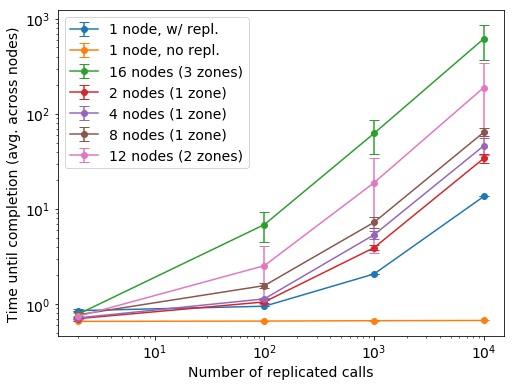

In [111]:
plt.figure(figsize=(8, 6))
matplotlib.rcParams.update({'font.size': 14})
plt.xscale('log')
plt.yscale('log')
for i in range(num_expts):
    plt.errorbar(results[i,:,0], results[i,:,1], stdev[i,:,1], label=labels[names[i]], marker='o', capsize=5)
plt.xlabel('Number of replicated calls')
plt.ylabel('Time until completion (avg. across nodes)')
plt.legend()

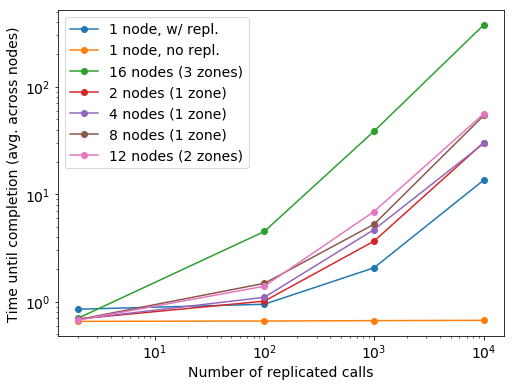

In [113]:
plt.figure(figsize=(8, 6))
matplotlib.rcParams.update({'font.size': 14})
plt.xscale('log')
plt.yscale('log')
for i in range(num_expts):
    plt.plot(best_case[i,:,0], best_case[i,:,1], label=labels[names[i]], marker='o')
plt.xlabel('Number of replicated calls')
plt.ylabel('Time until completion (avg. across nodes)')
plt.legend()

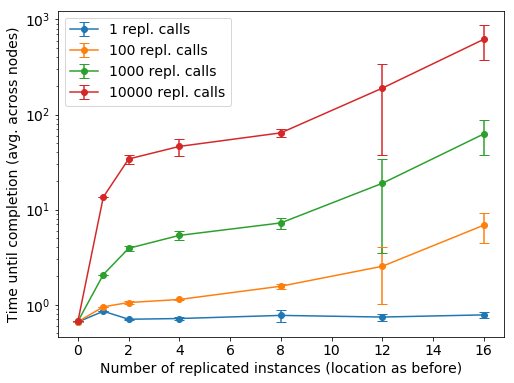

In [124]:
plt.figure(figsize=(8, 6))
matplotlib.rcParams.update({'font.size': 14})
# plt.xscale('log')
plt.yscale('log')

calls = [1, 100, 1000, 10000]
for i in range(4):
    plt.errorbar([labels[x] for x in keys], results[:,i,1], stdev[:,i,1], label='{} repl. calls'.format(calls[i]), marker='o', capsize=5)
plt.xlabel('Number of replicated instances (location as before)')
plt.ylabel('Time until completion (avg. across nodes)')
plt.legend()



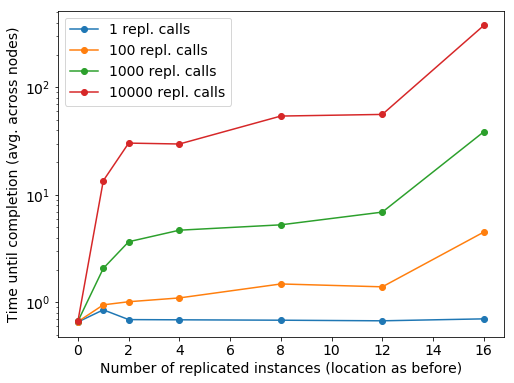

In [125]:
plt.figure(figsize=(8, 6))
matplotlib.rcParams.update({'font.size': 14})
# plt.xscale('log')
plt.yscale('log')

calls = [1, 100, 1000, 10000]
for i in range(4):
    plt.plot([labels[x] for x in keys], best_case[:,i,1], label='{} repl. calls'.format(calls[i]), marker='o')
plt.xlabel('Number of replicated instances (location as before)')
plt.ylabel('Time until completion (avg. across nodes)')
plt.legend()